In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from pyvis.network import Network
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from collections import defaultdict
import plotly.express as px
import community as community_louvain


# Loading

In [2]:
def load_all_files(folder_path):
    files = os.listdir(folder_path)

    graphs = {}
    node_features = {}
    feature_names = {}
    circles = {}
    egofeats = {}

    for file in files:
        file_path = os.path.join(folder_path, file)
        base_name, ext = os.path.splitext(file)

        if ext == '.edges':
            graphs[base_name] = load_edges(file_path)
        elif ext == '.feat':
            node_features[base_name] = load_feat(file_path)
        elif ext == '.featnames':
            feature_names[base_name] = load_featnames(file_path)
        elif ext == '.circles':
            circles[base_name] = load_circles(file_path)
        elif ext == '.egofeat':
            egofeats[base_name] = load_egofeat(file_path)

    return graphs, node_features, feature_names, circles, egofeats

# Individual file loading functions
def load_edges(file_path):
    G = nx.Graph()
    with open(file_path, 'r') as f:
        for line in f:
            node1, node2 = line.strip().split()
            G.add_edge(node1, node2)
    return G

def load_feat(file_path):
    node_features = {}
    with open(file_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            node_id = parts[0]
            features = list(map(float, parts[1:]))
            node_features[node_id] = features
    return node_features

def load_featnames(file_path):
    feature_names = {}
    with open(file_path, 'r') as f:
        for line in f:
            index, name = line.strip().split(maxsplit=1)
            feature_names[int(index)] = name
    return feature_names

def load_circles(file_path):
    circles = {}
    with open(file_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            circle_id = parts[0]
            members = parts[1:]
            circles[circle_id] = members
    return circles

def load_egofeat(file_path):
    egofeat = []
    with open(file_path, 'r') as f:
        for line in f:
            features = list(map(float, line.strip().split()))
            egofeat.append(features)
    return egofeat

# Example
folder_path = "D:\\Sem 4\\TIP\\Datasets\\facebook"
graphs, node_features, feature_names, circles, egofeats = load_all_files(folder_path)

# Now each dictionary contains the loaded data, indexed by the base file name.
print("Graphs Loaded:", graphs.keys())
print("Node Features Loaded:", node_features.keys())
print("Feature Names Loaded:", feature_names.keys())
print("Circles Loaded:", circles.keys())
print("Ego Features Loaded:", egofeats.keys())


Graphs Loaded: dict_keys(['0', '107', '1684', '1912', '3437', '348', '3980', '414', '686', '698'])
Node Features Loaded: dict_keys(['0', '107', '1684', '1912', '3437', '348', '3980', '414', '686', '698'])
Feature Names Loaded: dict_keys(['0', '107', '1684', '1912', '3437', '348', '3980', '414', '686', '698'])
Circles Loaded: dict_keys(['0', '107', '1684', '1912', '3437', '348', '3980', '414', '686', '698'])
Ego Features Loaded: dict_keys(['0', '107', '1684', '1912', '3437', '348', '3980', '414', '686', '698'])


# Descriptive Statistics

In [3]:
# Function to calculate descriptive stats for a graph
def descriptive_stats(G):
    centrality = nx.degree_centrality(G)
    betweenness = nx.betweenness_centrality(G)
    closeness = nx.closeness_centrality(G)
    return {
        "Number of Nodes": G.number_of_nodes(),
        "Number of Edges": G.number_of_edges(),
        "Average Degree": sum(dict(G.degree()).values()) / G.number_of_nodes(),
        "Density": nx.density(G),
        "Clustering Coefficient": nx.average_clustering(G),
        "Transitivity": nx.transitivity(G),
        "Diameter": nx.diameter(G) if nx.is_connected(G) else 'N/A',
        "Average Shortest Path Length": nx.average_shortest_path_length(G) if nx.is_connected(G) else 'N/A',
        "Average Degree Centrality": np.mean(list(centrality.values())),
        "Max Degree Centrality": np.max(list(centrality.values())),
        "Average Betweenness Centrality": np.mean(list(betweenness.values())),
        "Average Closeness Centrality": np.mean(list(closeness.values())),
        "Assortativity Coefficient (Degree)": nx.degree_assortativity_coefficient(G)
    }

# Function to analyze circles
def circle_stats(circles):
    circle_sizes = [len(circles[circle]) for circle in circles]
    return {
        "Number of Circles": len(circles),
        "Average Circle Size": np.mean(circle_sizes),
        "Std Dev Circle Sizes": np.std(circle_sizes),
        "Min Circle Size": np.min(circle_sizes),
        "Max Circle Size": np.max(circle_sizes)
    }

# Function to generate and print all descriptive stats
def generate_and_print_all_stats(graphs, feature_names, circles):
    for graph_name, graph in graphs.items():
        print(f"\nDescriptive Statistics for Graph: {graph_name}")
        stats = descriptive_stats(graph)
        for key, value in stats.items():
            print(f"{key}: {value}")

    if circles:
        for circle_name, circle in circles.items():
            print(f"\nDescriptive Statistics for Circles: {circle_name}")
            stats = circle_stats(circle)
            for key, value in stats.items():
                print(f"{key}: {value}")

    if feature_names:
        # Selecting the first available file to display feature names
        first_feature_file = next(iter(feature_names.values()), {})
        unique_main_feature_names = sorted(set(name.split(';')[0] for name in first_feature_file.values()))
        print("\nFeature Names (Unique and Alphabetical):")
        for name in unique_main_feature_names:
            print(name)

graphs, node_features, feature_names, circles, egofeats = load_all_files("D:\\Sem 4\\TIP\\Datasets\\facebook")
generate_and_print_all_stats(graphs, feature_names, circles)



Descriptive Statistics for Graph: 0
Number of Nodes: 333
Number of Edges: 2519
Average Degree: 15.12912912912913
Density: 0.045569666051593766
Clustering Coefficient: 0.5082445417696636
Transitivity: 0.4258693841944566
Diameter: N/A
Average Shortest Path Length: N/A
Average Degree Centrality: 0.04556966605159376
Max Degree Centrality: 0.23192771084337352
Average Betweenness Centrality: 0.007872375706248963
Average Closeness Centrality: 0.2656669490073742
Assortativity Coefficient (Degree): 0.23603916647565584

Descriptive Statistics for Graph: 107
Number of Nodes: 1034
Number of Edges: 26749
Average Degree: 51.73887814313346
Density: 0.05008603886072939
Clustering Coefficient: 0.5264047980773338
Transitivity: 0.5045088189930924
Diameter: 9
Average Shortest Path Length: 2.951675932150073
Average Degree Centrality: 0.050086038860729404
Max Degree Centrality: 0.24491771539206197
Average Betweenness Centrality: 0.0018911588489826285
Average Closeness Centrality: 0.3454290006297708
Assorta

# Descriptive stats vislisations

C:\Users\deads\AppData\Local\Temp\ipykernel_35572\2351284930.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=graph_labels, y=values, ax=axes[idx], palette=colors)
C:\Users\deads\AppData\Local\Temp\ipykernel_35572\2351284930.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=graph_labels, y=values, ax=axes[idx], palette=colors)
C:\Users\deads\AppData\Local\Temp\ipykernel_35572\2351284930.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=graph_labels, y=values, ax=axes[idx], palette=colors)
C:\Users\deads\AppData\Local\Temp\ipy

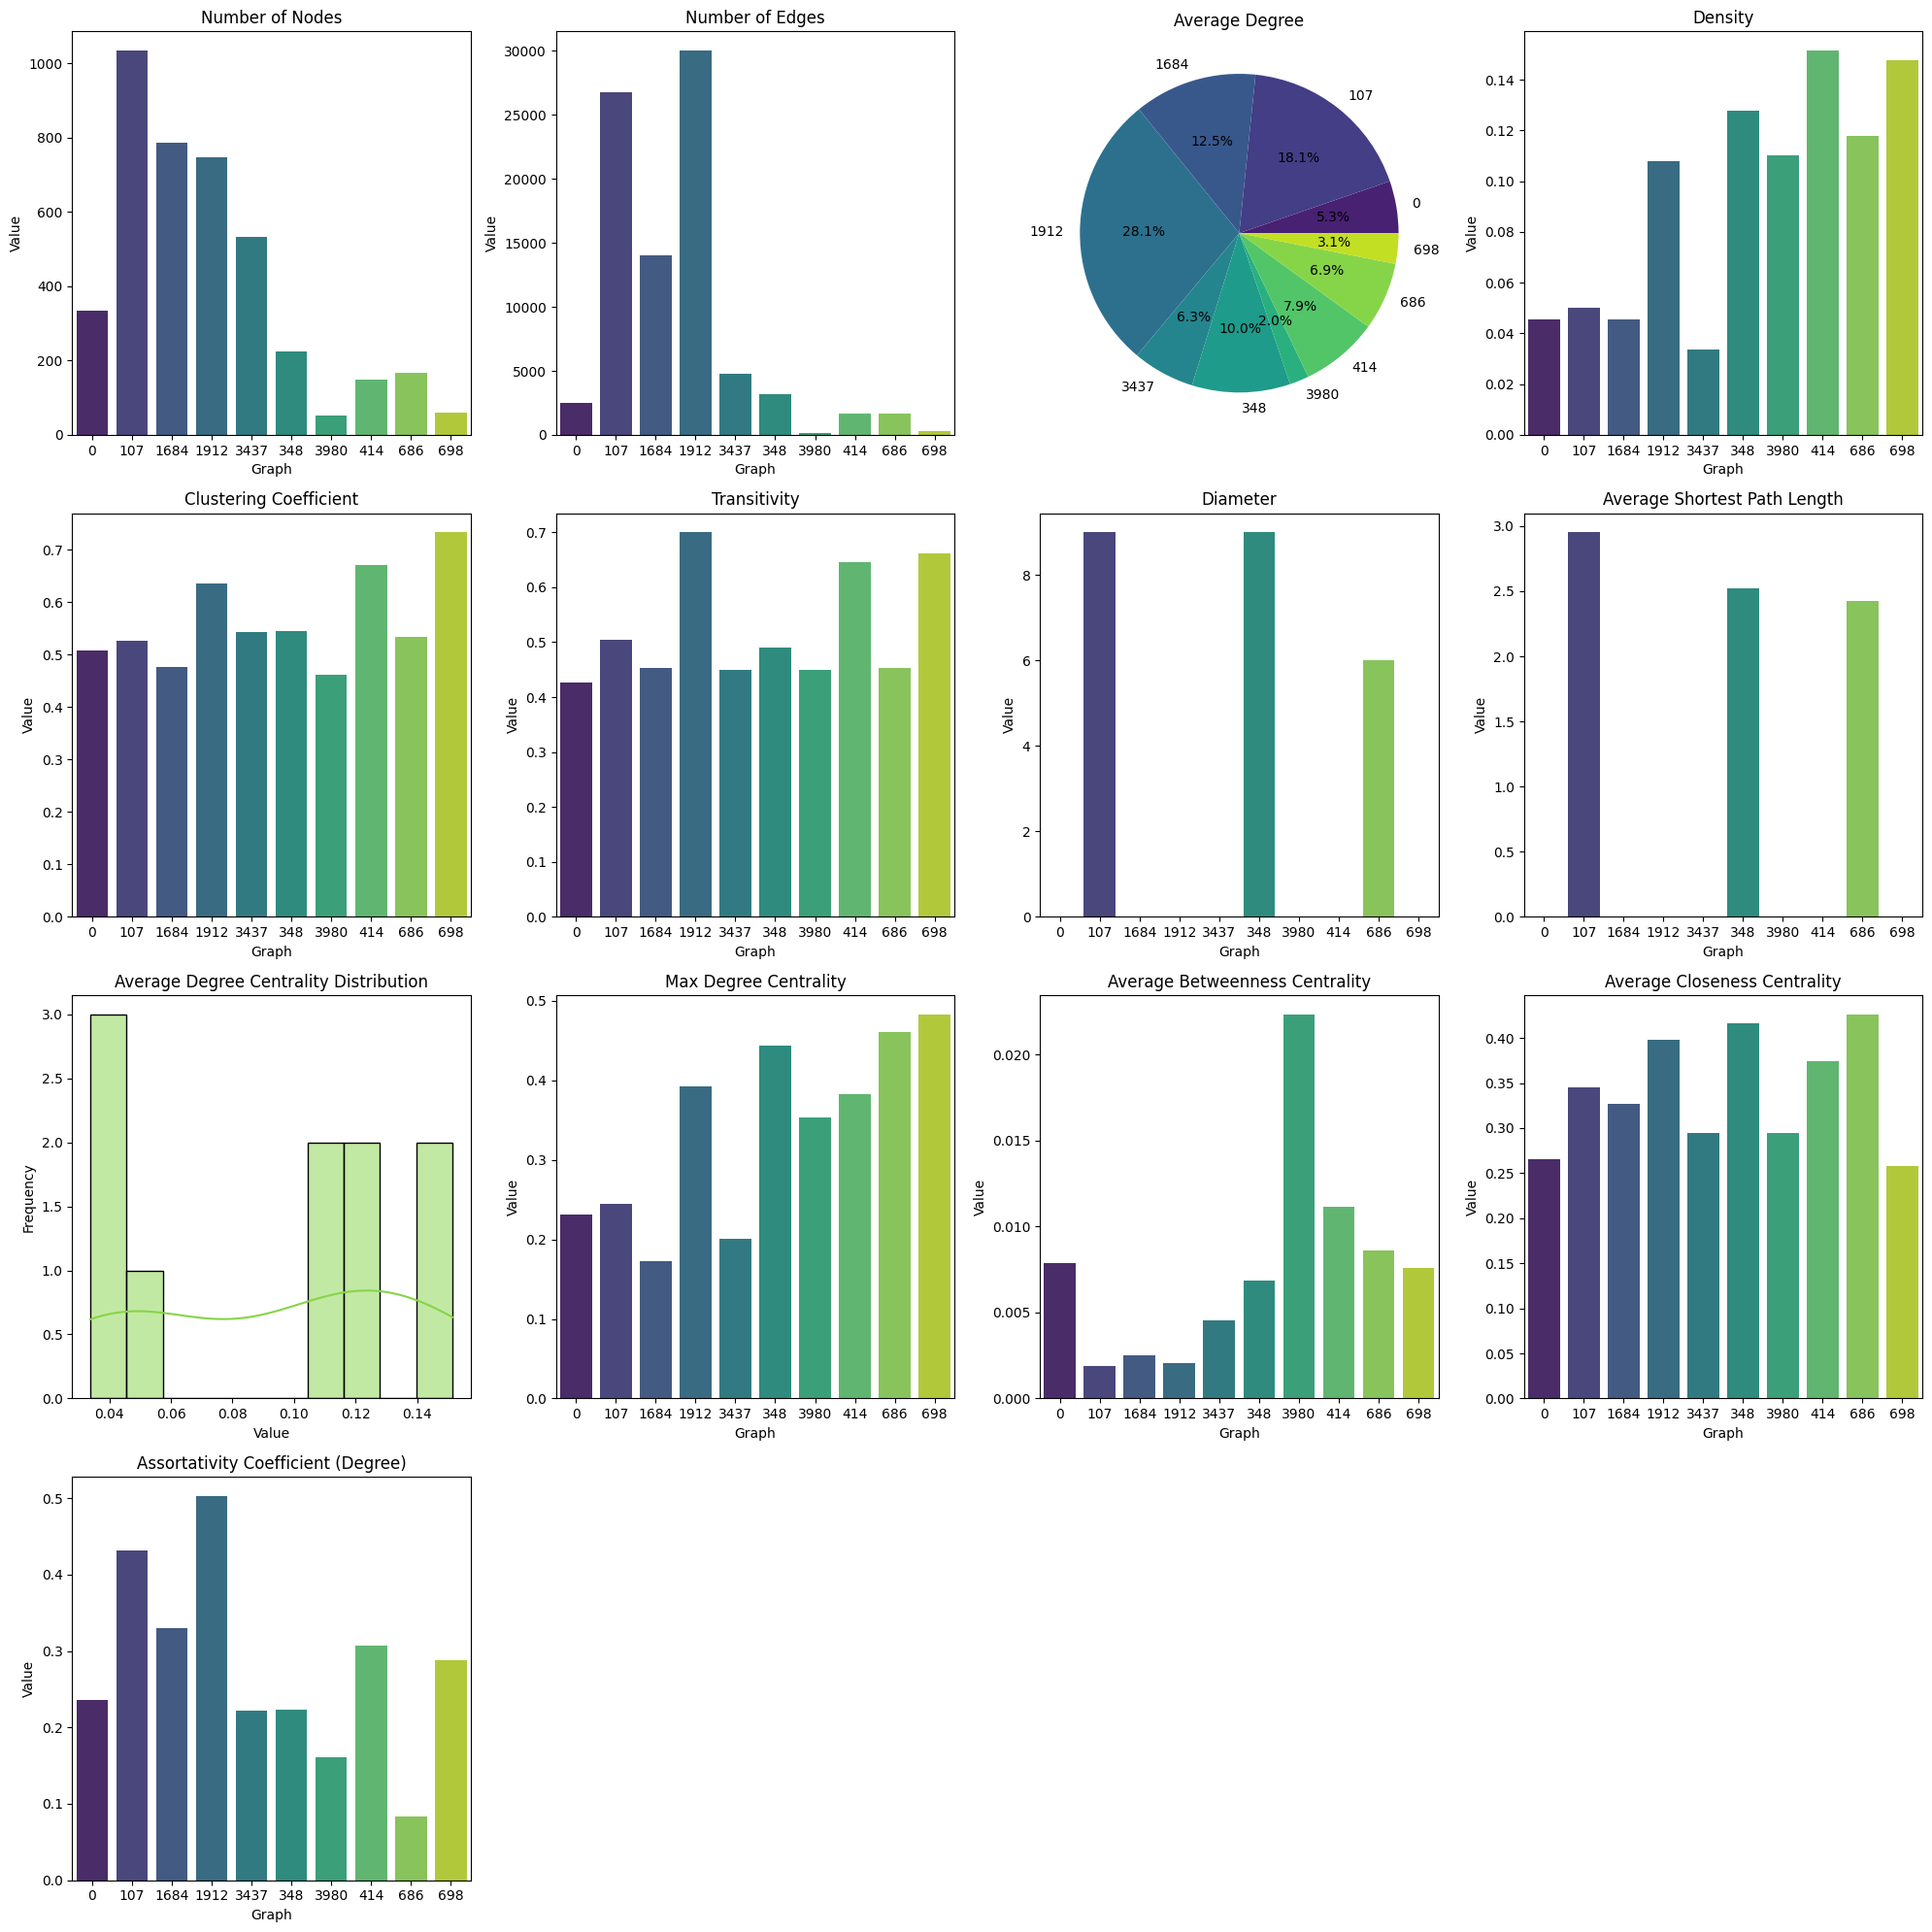

In [4]:
def visualize_comparative_stats(graphs):
    all_stats = {}
    graph_labels = [str(g) for g in graphs.keys()]

    # Initializing the dictionary for collecting statistics
    for stat in descriptive_stats(next(iter(graphs.values()))):
        all_stats[stat] = []

    # Collecting all stats for each graph
    for graph_name, graph in graphs.items():
        stats = descriptive_stats(graph)
        for stat, value in stats.items():
            all_stats[stat].append(value if not isinstance(value, str) else np.nan)

    # Converting stats to DataFrame for easier handling with seaborn
    stats_df = pd.DataFrame(all_stats, index=graph_labels)

    # Determining the number of plots based on stats types
    num_stats = len(all_stats)
    fig, axes = plt.subplots(nrows=(num_stats + 3) // 4, ncols=4, figsize=(20, 5 * ((num_stats + 3) // 4)))
    axes = axes.flatten()

    # Setting color palette
    colors = sns.color_palette("viridis", n_colors=len(graph_labels))

    for idx, (stat, values) in enumerate(stats_df.items()):
        if stat == "Average Degree":
            axes[idx].pie(values, labels=graph_labels, autopct='%1.1f%%', colors=colors)
            axes[idx].set_title(stat)
        elif stat == "Average Degree Centrality":
            sns.histplot(values, bins=10, kde=True, ax=axes[idx], color=colors[idx % len(colors)])
            axes[idx].set_title(f"{stat} Distribution")
            axes[idx].set_xlabel("Value")
            axes[idx].set_ylabel("Frequency")
        elif stat == "Assortativity":
            sns.lineplot(x=graph_labels, y=values, ax=axes[idx], marker='o', color=colors[idx % len(colors)])
            axes[idx].set_title(f"{stat} Over Graphs")
            axes[idx].set_xlabel("Graph")
            axes[idx].set_ylabel("Value")
        else:
            sns.barplot(x=graph_labels, y=values, ax=axes[idx], palette=colors)
            axes[idx].set_title(stat)
            axes[idx].set_xlabel("Graph")
            axes[idx].set_ylabel("Value")

    # Cleanning up empty subplots
    for ax in axes[len(stats_df.columns):]:
        ax.remove()

    plt.tight_layout()
    plt.show()

folder_path = "D:\\Sem 4\\TIP\\Datasets\\facebook"
graphs, node_features, feature_names, circles, egofeats = load_all_files(folder_path)
visualize_comparative_stats(graphs)


C:\Users\deads\AppData\Local\Temp\ipykernel_35572\3851978667.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=graph_labels, y=stats_dict[stat], ax=axes[i], palette="viridis")
C:\Users\deads\AppData\Local\Temp\ipykernel_35572\3851978667.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=graph_labels, y=stats_dict[stat], ax=axes[i], palette="viridis")
C:\Users\deads\AppData\Local\Temp\ipykernel_35572\3851978667.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=graph_labels, y=stats_dict[stat], ax=axes[i], palette="viridis")


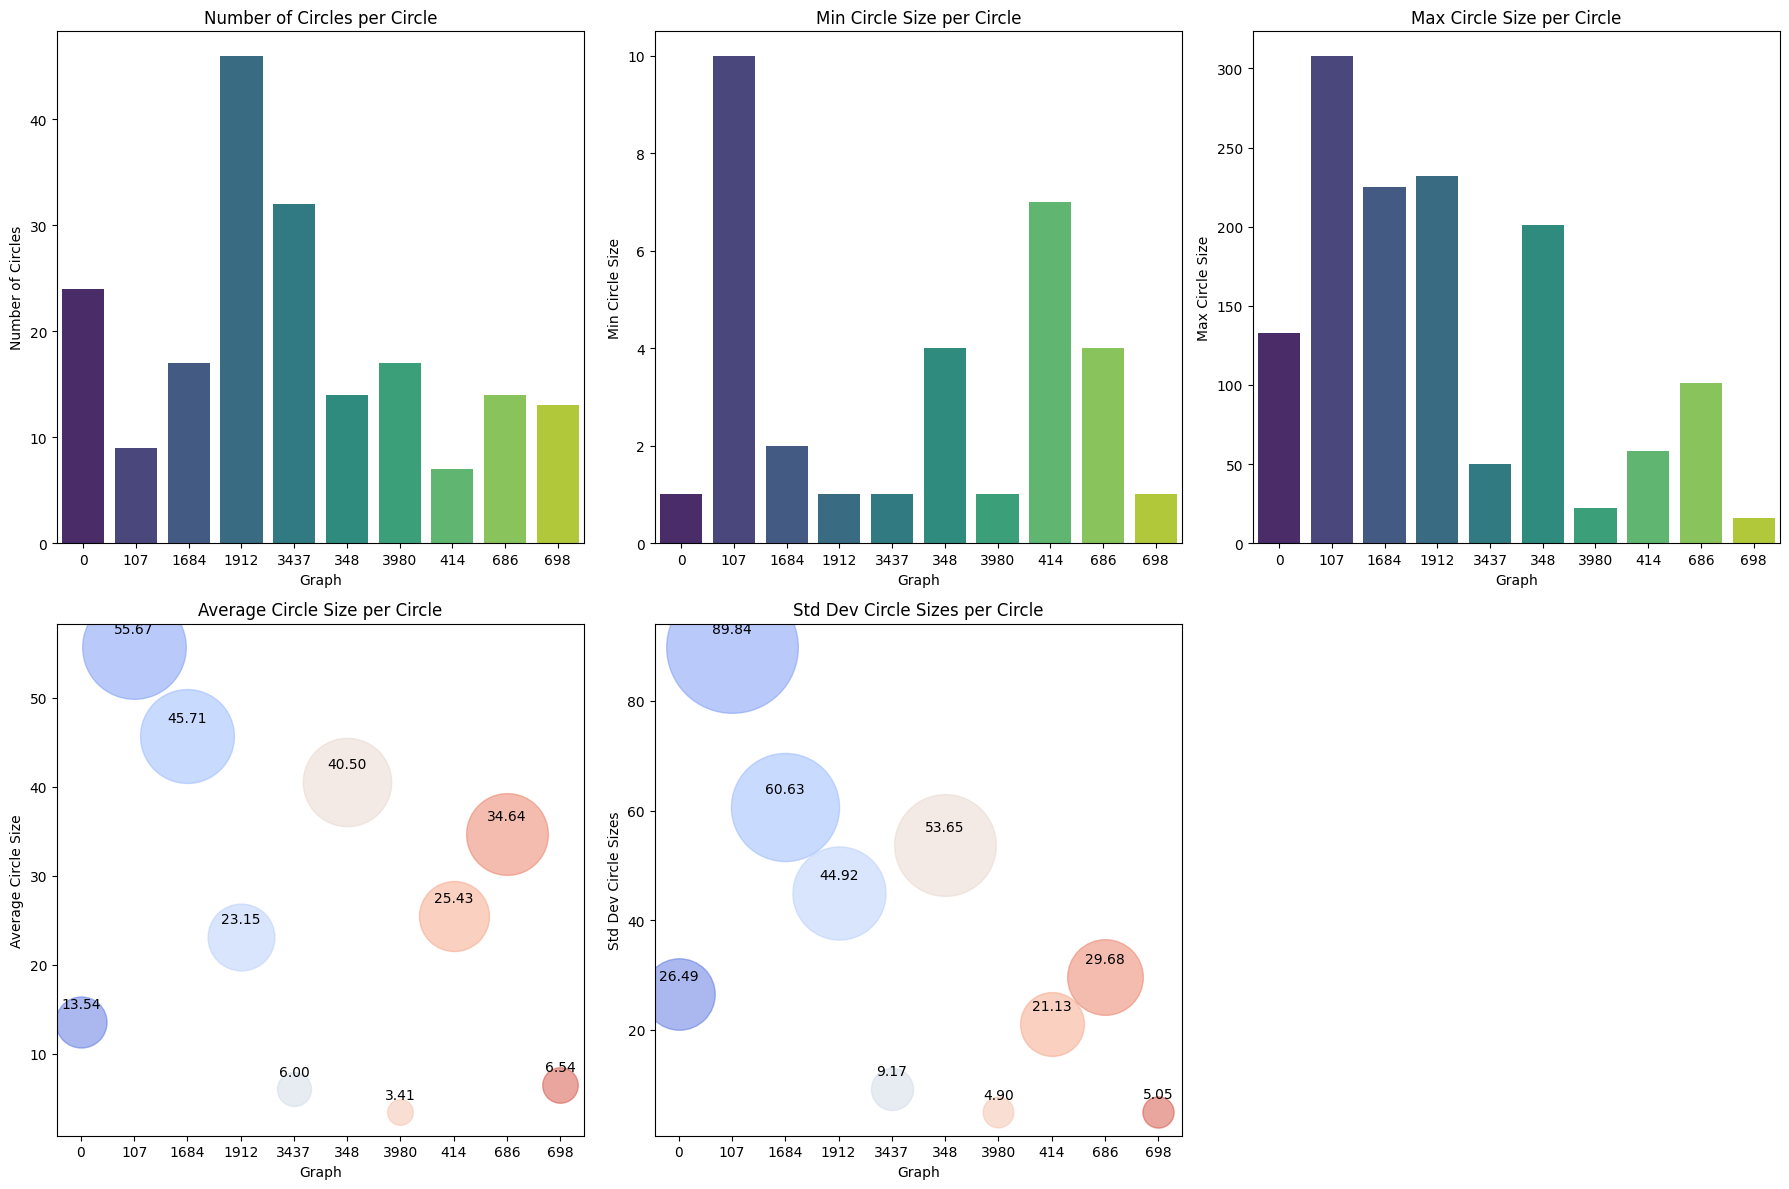

In [5]:
def visualize_circle_stats(circles_dict):
    stats_dict = {key: [] for key in circle_stats(next(iter(circles_dict.values())))}
    graph_labels = list(circles_dict.keys())

    # Collecting stats for each graph's circles
    for circle_name, circle in circles_dict.items():
        stats = circle_stats(circle)
        for stat, value in stats.items():
            stats_dict[stat].append(value)

    # Plotting
    num_stats = len(stats_dict)
    rows, cols = 2, 3  # Define the layout of the subplots
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(cols * 6, rows * 6))
    axes = axes.flatten()

    # Setting color palette for bubbles
    colors = sns.color_palette("coolwarm", len(graph_labels))

    # Bar charts for certain stats
    bar_stats = ["Number of Circles", "Min Circle Size", "Max Circle Size"]
    for i, stat in enumerate(bar_stats):
        sns.barplot(x=graph_labels, y=stats_dict[stat], ax=axes[i], palette="viridis")
        axes[i].set_title(f"{stat} per Circle")
        axes[i].set_xlabel("Graph")
        axes[i].set_ylabel(stat)

    # Bubble charts for the other stats
    bubble_stats = ["Average Circle Size", "Std Dev Circle Sizes"]
    for i, stat in enumerate(bubble_stats):
        bubble_sizes = np.array(stats_dict[stat]) * 100  
        for j, size in enumerate(bubble_sizes):
            axes[i + len(bar_stats)].scatter(graph_labels[j], stats_dict[stat][j], s=size, alpha=0.5, color=colors[j])
            axes[i + len(bar_stats)].annotate(f"{stats_dict[stat][j]:.2f}", (graph_labels[j], stats_dict[stat][j]), textcoords="offset points", xytext=(0,10), ha='center')
        axes[i + len(bar_stats)].set_title(f"{stat} per Circle")
        axes[i + len(bar_stats)].set_xlabel("Graph")
        axes[i + len(bar_stats)].set_ylabel(stat)

    # Removing unused subplots
    for ax in axes[num_stats:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

visualize_circle_stats(circles)


# Visualizations and Analysis

In [5]:
def comprehensive_network_analysis(graph):
    # Initialize Network for visualization with adjusted size
    nt = Network('1000px', '800px', notebook=False, bgcolor="#222222", font_color="white")

    # Community Detection using Louvain Method
    partition = community_louvain.best_partition(graph)
    
    # Setting node options based on centrality measures and community
    centrality_measures = {
        'degree': nx.degree_centrality(graph),
        'closeness': nx.closeness_centrality(graph),
        'betweenness': nx.betweenness_centrality(graph),
        'eigenvector': nx.eigenvector_centrality(graph, max_iter=1000, tol=1e-06)
    }
    # Setting node options based on centrality measures and community
    for node in graph.nodes():
        size = centrality_measures['degree'][node] * 50  
        color = f'hsl({partition[node] * 100 % 360}, 100%, 50%)'  
        title = (
            f"Node: {node}\n"
            f"Community: {partition[node]}\n"
            f"Degree Centrality: {centrality_measures['degree'][node]:.4f}\n"
            f"Closeness Centrality: {centrality_measures['closeness'][node]:.4f}\n"
            f"Betweenness Centrality: {centrality_measures['betweenness'][node]:.4f}\n"
            f"Eigenvector Centrality: {centrality_measures['eigenvector'][node]:.4f}"
        )
        nt.add_node(node, title=title, value=size, color=color)

    # Adding edges
    for u, v, d in graph.edges(data=True):
        nt.add_edge(u, v, value=d.get('weight', 1))

    # Subgraph Analysis
    connected_components = nx.connected_components(graph)
    subgraphs = [graph.subgraph(component).copy() for component in connected_components]
    print(f'Number of subgraphs: {len(subgraphs)}')

    # Network Robustness Analysis
    node_to_remove = list(graph.nodes())[0]
    graph_copy = graph.copy()
    graph_copy.remove_node(node_to_remove)
    connected = "connected" if nx.is_connected(graph_copy) else "not connected"
    print(f"Network is {connected} after removing node {node_to_remove}.")

    # Enable physics controls
    nt.show_buttons(filter_=['physics'])

    
    nt.save_graph('edges.html')
    nt.show('edges.html')


graph_name = '0'
graph = graphs[graph_name]
comprehensive_network_analysis(graph)


Number of subgraphs: 5
Network is not connected after removing node 236.
aa.html


AttributeError: 'NoneType' object has no attribute 'render'

## circles

In [9]:
def build_graph_from_circles(circle_dict):
    G = nx.Graph()
    # First, ensure every node is added with its title attribute
    for circle, members in circle_dict.items():
        for member in members:
            if not G.has_node(member):
                # Calculating the number of circles each member belongs to
                member_circles = sum(member in circle_members for circle_members in circle_dict.values())
                G.add_node(member, title=f"Node: {member}\nCircles: {member_circles}")

    # Now, adding edges between members within each circle
    for circle, members in circle_dict.items():
        for member in members:
            for other_member in members:
                if member != other_member and not G.has_edge(member, other_member):
                    G.add_edge(member, other_member)

    return G


def ego_network_analysis(graph, node_id):
    ego_net = nx.ego_graph(graph, node_id)
    nt_ego = Network('800px', '800px', notebook=True, bgcolor="#222222", font_color="white")
    for node in ego_net.nodes(data=True):
        nt_ego.add_node(node[0], title=node[1]['title'], size=20)
    for edge in ego_net.edges():
        nt_ego.add_edge(edge[0], edge[1])
    nt_ego.show_buttons(filter_=['physics'])
    nt_ego.show("ego_network.html")

def visualize_network_diagram(circle_dict):
    G = build_graph_from_circles(circle_dict)
    nt = Network('1000px', '800px', notebook=True, bgcolor="#222222", font_color="white")
    for node in G.nodes(data=True):
        nt.add_node(node[0], title=node[1]['title'], size=15)
    for edge in G.edges():
        nt.add_edge(edge[0], edge[1])
    nt.show_buttons(filter_=['physics'])
    nt.save_graph('circles_network.html')
    nt.show('circles_network.html')

# Assuming 'circles['0']' contains properly formatted data
circle_dict = {key: set(value) for key, value in circles['0'].items()}
common_memberships = {member: sum(1 for values in circle_dict.values() if member in values) for members in circle_dict.values() for member in members if sum(1 for values in circle_dict.values() if member in values) > 1}
visualize_network_diagram(circle_dict)

# Example of ego node, select a node with multiple memberships
multi_member_node = next((member for member, count in common_memberships.items() if count > 1), None)
if multi_member_node:
    ego_network_analysis(build_graph_from_circles(circle_dict), multi_member_node)


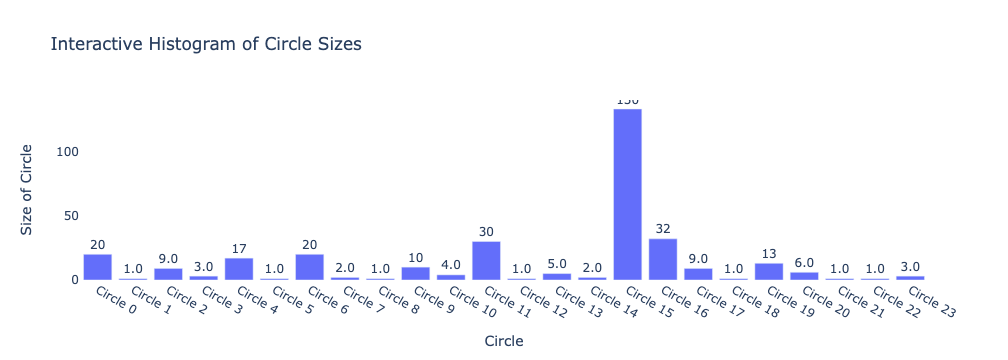

Number of Circles: 24
Sizes of Circles: [20, 1, 9, 3, 17, 1, 20, 2, 1, 10, 4, 30, 1, 5, 2, 133, 32, 9, 1, 13, 6, 1, 1, 3]


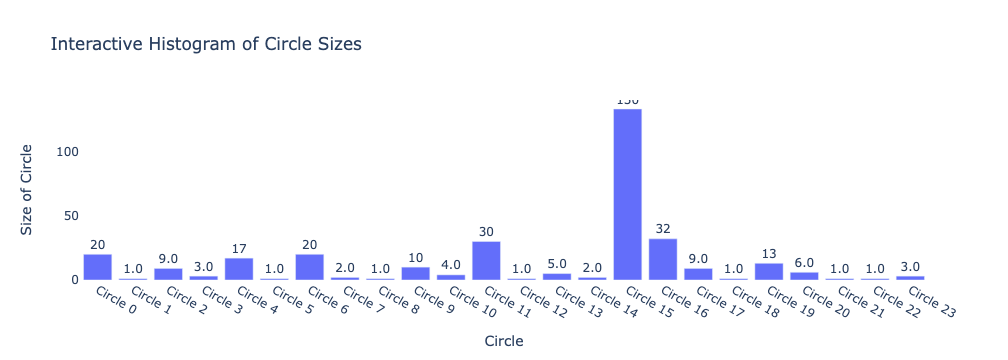

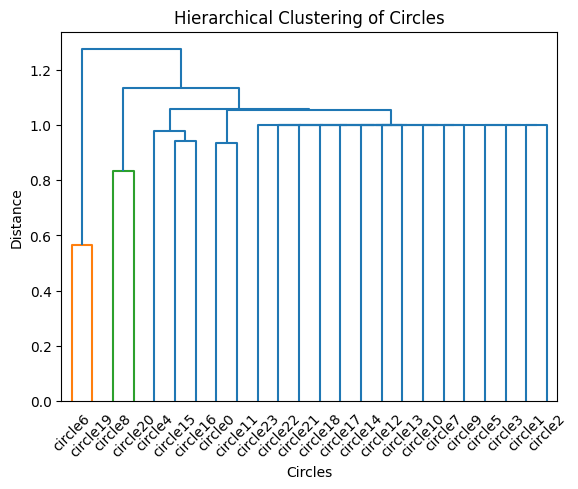

Number of Circles: 24
Sizes of Circles: [20, 1, 9, 3, 17, 1, 20, 2, 1, 10, 4, 30, 1, 5, 2, 133, 32, 9, 1, 13, 6, 1, 1, 3]


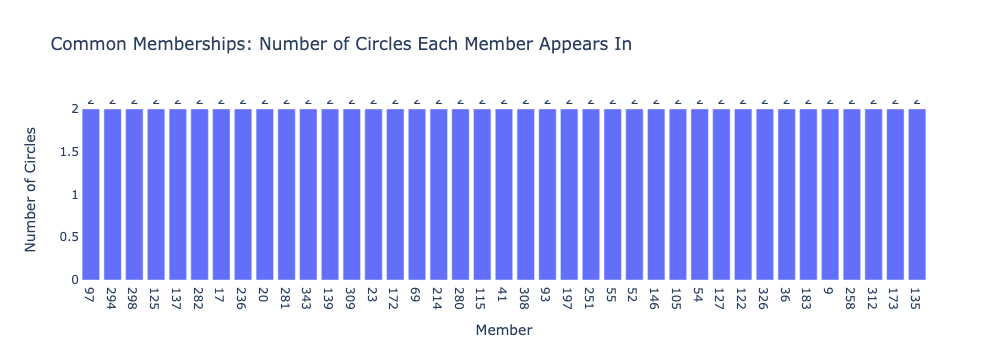

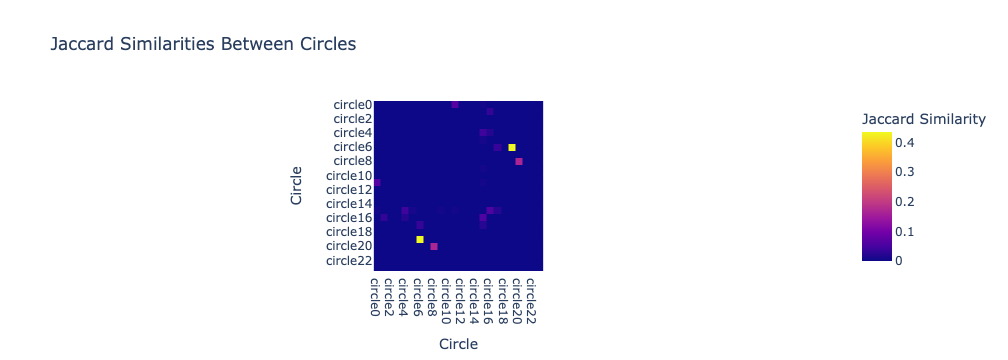

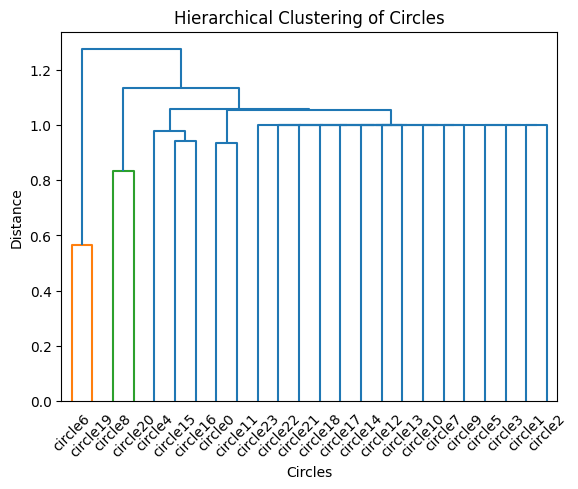

In [8]:
# Assuming circle_dict is properly loaded with sets of members
circle_dict = {key: set(value) for key, value in circles['0'].items()}

def circle_sizes(circle_dict):
    sizes_of_circles = [len(members) for members in circle_dict.values()]
    circle_labels = [f"Circle {i}" for i in range(len(sizes_of_circles))]

    # Creatinf a DataFrame for better handling with plotly
    df = pd.DataFrame({
        'Circle Label': circle_labels,
        'Size of Circle': sizes_of_circles
    })

    fig = px.bar(df, x='Circle Label', y='Size of Circle', text='Size of Circle',
                 title="Interactive Histogram of Circle Sizes")
    fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
    fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide',
                      xaxis_title="Circle",
                      yaxis_title="Size of Circle",
                      plot_bgcolor='white',
                      showlegend=False)
    fig.show()
circle_sizes(circle_dict)

# Basic Descriptive Statistics
def descriptive_statistics(circle_dict):
    num_circles = len(circle_dict)
    sizes_of_circles = [len(members) for members in circle_dict.values()]
    print(f"Number of Circles: {num_circles}")
    print(f"Sizes of Circles: {sizes_of_circles}")

    # Common Memberships
    all_members = [member for members in circle_dict.values() for member in members]
    unique_members = set(all_members)
    common_memberships = {member: all_members.count(member) for member in unique_members if all_members.count(member) > 1}
    return common_memberships

# Intersection and Union Analysis
def jaccard_similarity_analysis(circle_dict):
    circle_list = list(circle_dict.values())
    jaccard_similarities = {}
    for (circle1, members1), (circle2, members2) in combinations(circle_dict.items(), 2):
        intersection = len(set(members1).intersection(set(members2)))
        union = len(set(members1).union(set(members2)))
        jaccard_similarities[(circle1, circle2)] = intersection / union if union != 0 else 0
    return jaccard_similarities

# Hierarchical Clustering of Circles Based on Memberships
def hierarchical_clustering(circle_dict):
    unique_members = set(member for members in circle_dict.values() for member in members)
    membership_matrix = pd.DataFrame(0, index=list(unique_members), columns=list(circle_dict.keys()))
    for circle, members in circle_dict.items():
        membership_matrix.loc[list(members), circle] = 1

    distance_matrix = pdist(membership_matrix.T, 'jaccard')
    linkage_matrix = linkage(distance_matrix, 'ward')
    dendrogram(linkage_matrix, labels=list(circle_dict.keys()))
    plt.title('Hierarchical Clustering of Circles')
    plt.xlabel('Circles')
    plt.ylabel('Distance')
    plt.show()


def visualize_common_memberships(common_memberships):
    # Converting to DataFrame for easier handling with Plotly
    data = pd.DataFrame(list(common_memberships.items()), columns=['Member', 'Number of Circles'])
    data.sort_values(by='Number of Circles', ascending=False, inplace=True)
    
    fig = px.bar(data, x='Member', y='Number of Circles', text='Number of Circles',
                 title="Common Memberships: Number of Circles Each Member Appears In")
    fig.update_traces(texttemplate='%{text}', textposition='outside')
    fig.update_layout(xaxis_title="Member",
                      yaxis_title="Number of Circles",
                      plot_bgcolor='white',
                      showlegend=False)
    fig.show()

def visualize_jaccard_similarities(jaccard_similarities, circle_dict):
    # Converting the dictionary to a matrix for the heatmap
    labels = list(circle_dict.keys())
    jaccard_matrix = pd.DataFrame(0.0, index=labels, columns=labels)
    
    for (circle1, circle2), similarity in jaccard_similarities.items():
        jaccard_matrix.at[circle1, circle2] = similarity
        jaccard_matrix.at[circle2, circle1] = similarity
    
    fig = px.imshow(jaccard_matrix, text_auto=True,
                    labels=dict(x="Circle", y="Circle", color="Jaccard Similarity"),
                    x=labels,
                    y=labels,
                    title="Jaccard Similarities Between Circles")
    fig.update_xaxes(side="bottom")
    fig.show()



descriptive_statistics(circle_dict)
circle_sizes(circle_dict)

# After calculating common memberships
common_memberships = descriptive_statistics(circle_dict)
visualize_common_memberships(common_memberships)

# Calculating and visualizing Jaccard similarities
jaccard_similarities = jaccard_similarity_analysis(circle_dict)
visualize_jaccard_similarities(jaccard_similarities, circle_dict)

# Perform hierarchical clustering and show the dendrogram
hierarchical_clustering(circle_dict)


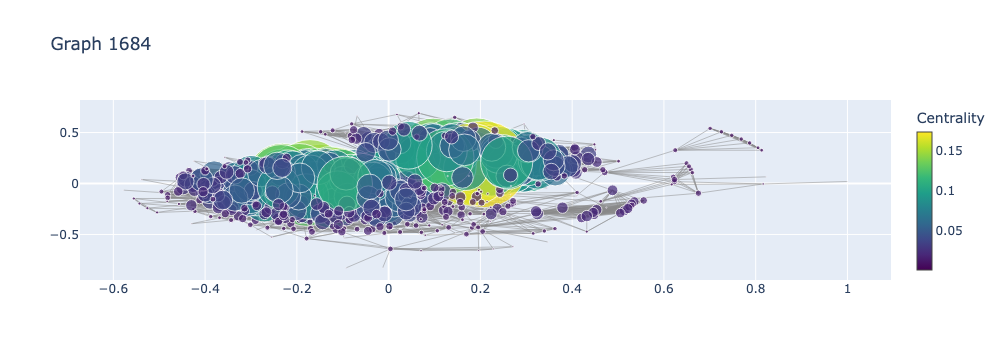

In [ ]:
def visualize_graph(G, title="Network Graph"):
    pos = nx.kamada_kawai_layout(G)  
    node_x, node_y = zip(*pos.values())

    # Using centrality or degree for node size
    centrality = nx.degree_centrality(G)
    node_sizes = [500 * centrality[node] for node in G.nodes()]
    node_colors = [centrality[node] for node in G.nodes()]

    edge_trace = go.Scatter(
        x=[],
        y=[],
        line=dict(width=0.5, color='#888'),
        mode='lines'
    )
    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_trace['x'] += (x0, x1, None)
        edge_trace['y'] += (y0, y1, None)

    node_trace = go.Scatter(
        x=node_x,
        y=node_y,
        mode='markers',
        marker=dict(
            showscale=True,
            colorscale='Viridis',
            color=node_colors,
            size=node_sizes,
            colorbar=dict(thickness=15, title="Centrality")
        ),
        text=list(G.nodes())  # Displays node labels
    )

    fig = go.Figure(data=[edge_trace, node_trace])
    fig.update_layout(title=title, showlegend=False)
    fig.show()

# Example:
visualize_graph(graphs['1684'], "Graph 1684")



